## Seoul Bike Sharing Demand Data Set

Abstract:- The dataset contains count of public bikes rented at each hour in Seoul Bike haring System with the corresponding Weather data and Holidays information

### Data Set Information:-

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.



### Attribute Information:-

- Date : year-month-day
- Rented Bike count - Count of bikes rented at each hour
- Hour - Hour of he day
- Temperature-Temperature in Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

The aim is to make prediction of bike count required at each hour for the stable supply of rental bikes.

### Importing libraires and resources


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
%matplotlib inline
import joblib
sns.set()

### Reading and Understanding the Data


In [2]:
# Read the dataset

bike_data= pd.read_csv(r"C:\Users\kanik\Documents\Python\SeoulBikeData.csv",encoding="unicode_escape")

In [3]:
# Dimensions of dataset
bike_data.shape

(8760, 14)

In [4]:
# Let's see how our dataset looks like

bike_data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Show 20 rows sorted by 'Rented Bike Count' in descending order
bike_data.nlargest(20, 'Rented Bike Count')


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4818,19/06/2018,3556,18,24.1,57,2.9,1301,15.0,0.56,0.0,0.0,Summer,No Holiday,Yes
4866,21/06/2018,3418,18,27.8,43,3.0,1933,14.0,1.35,0.0,0.0,Summer,No Holiday,Yes
4650,12/06/2018,3404,18,24.9,53,3.6,2000,14.6,1.28,0.0,0.0,Summer,No Holiday,Yes
4842,20/06/2018,3384,18,27.0,55,3.1,1246,17.1,1.26,0.0,0.0,Summer,No Holiday,Yes
4458,04/06/2018,3380,18,24.4,48,1.9,1998,12.6,0.56,0.0,0.0,Summer,No Holiday,Yes
4890,22/06/2018,3365,18,29.3,27,3.4,1977,8.3,1.24,0.0,0.0,Summer,No Holiday,Yes
4554,08/06/2018,3309,18,26.2,54,2.2,1183,16.1,0.88,0.0,0.0,Summer,No Holiday,Yes
6810,10/09/2018,3298,18,25.9,42,1.1,2000,11.9,0.48,0.0,0.0,Autumn,No Holiday,Yes
6978,17/09/2018,3277,18,25.3,56,2.8,1992,15.8,0.54,0.0,0.0,Autumn,No Holiday,Yes
6858,12/09/2018,3256,18,27.0,44,1.4,2000,13.6,0.62,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# Show 20 rows sorted by 'Rented Bike Count' in ascending order
bike_data.nsmallest(20, 'Rented Bike Count')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.00,0.0,0.0,Spring,No Holiday,No
3145,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.00,0.0,0.0,Spring,No Holiday,No
3146,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.00,0.0,0.0,Spring,No Holiday,No
3147,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.00,0.0,0.0,Spring,No Holiday,No
3148,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.00,0.0,0.0,Spring,No Holiday,No
3149,11/04/2018,0,5,9.7,84,1.7,447,7.1,0.00,0.0,0.0,Spring,No Holiday,No
3150,11/04/2018,0,6,9.0,86,2.0,442,6.7,0.00,0.0,0.0,Spring,No Holiday,No
3151,11/04/2018,0,7,8.8,85,1.1,438,6.4,0.11,0.0,0.0,Spring,No Holiday,No
3152,11/04/2018,0,8,9.7,77,1.6,519,5.8,0.68,0.0,0.0,Spring,No Holiday,No
3153,11/04/2018,0,9,11.8,59,2.1,975,4.0,1.44,0.0,0.0,Spring,No Holiday,No


In [7]:
bike_data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [8]:
#Let's get some information on the imported dataset
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
bike_data.info

<bound method DataFrame.info of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)

In [10]:
# Let's see some data summary

bike_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


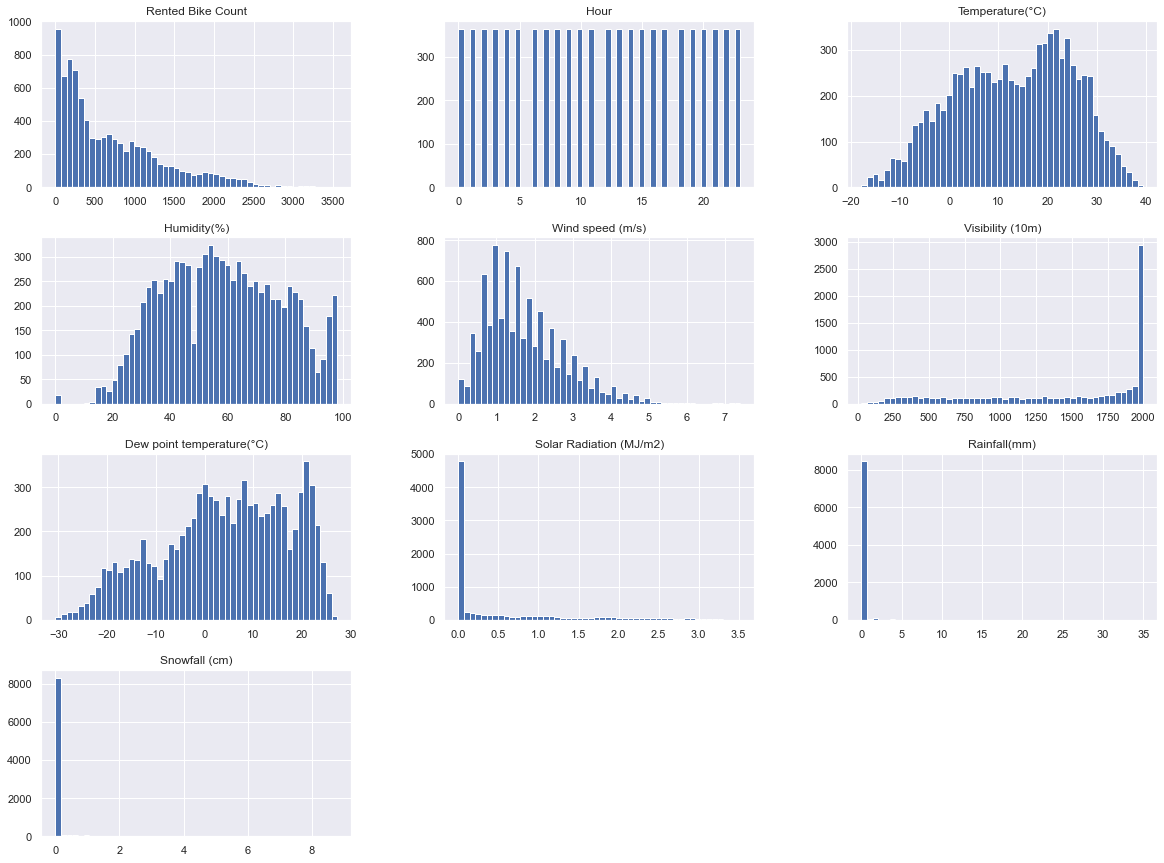

In [11]:
## Let's visualize the data distribution
bike_data.hist(bins=50, figsize=(20,15))
plt.show()

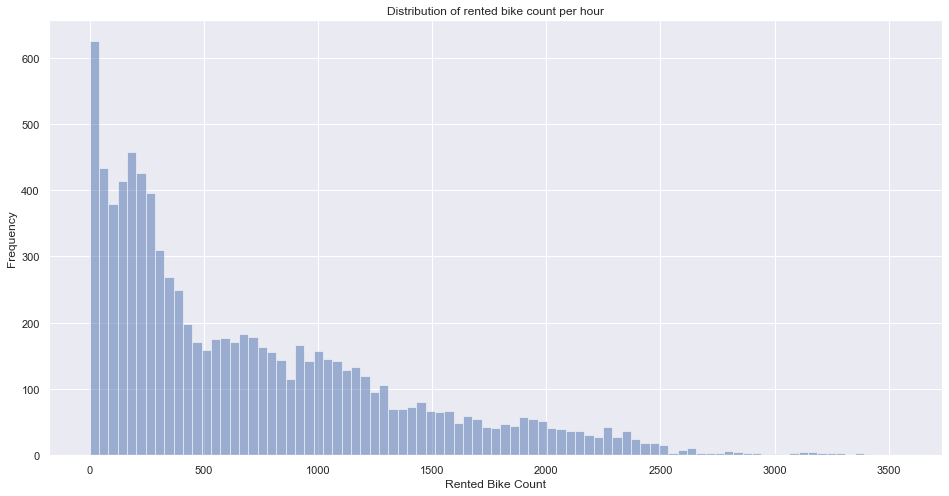

In [12]:
N = len(bike_data) // 100
plt.figure(figsize=(16,8))
plt.hist(x=bike_data['Rented Bike Count'], bins=N, alpha=0.5)
plt.title('Distribution of rented bike count per hour')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
pass

<AxesSubplot:xlabel='Rented Bike Count'>

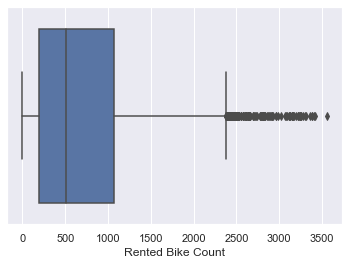

In [13]:
sns.boxplot(x=bike_data['Rented Bike Count'])

Text(0.5, 1.0, 'Solar Radiation (MJ/m2)')

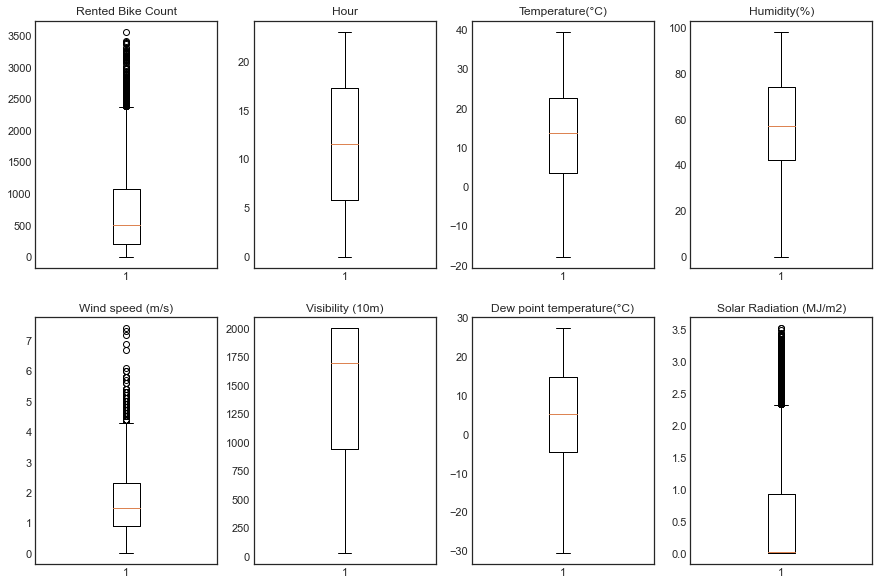

In [14]:
# Distribution of data features and skewness 
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(241)
plt.boxplot(bike_data['Rented Bike Count'])
ax.set_title('Rented Bike Count')
ax=plt.subplot(242)
plt.boxplot(bike_data['Hour'])
ax.set_title('Hour')
ax=plt.subplot(243)
plt.boxplot(bike_data['Temperature(°C)'])
ax.set_title('Temperature(°C)')
ax=plt.subplot(244)
plt.boxplot(bike_data['Humidity(%)'])
ax.set_title('Humidity(%)')
ax=plt.subplot(245)
plt.boxplot(bike_data['Wind speed (m/s)'])
ax.set_title('Wind speed (m/s)')
ax=plt.subplot(246)
plt.boxplot(bike_data['Visibility (10m)'])
ax.set_title('Visibility (10m)')
ax=plt.subplot(247)
plt.boxplot(bike_data['Dew point temperature(°C)'])
ax.set_title('Dew point temperature(°C)')
ax=plt.subplot(248)
plt.boxplot(bike_data['Solar Radiation (MJ/m2)'])
ax.set_title('Solar Radiation (MJ/m2)')

### Pairwise comparison between features

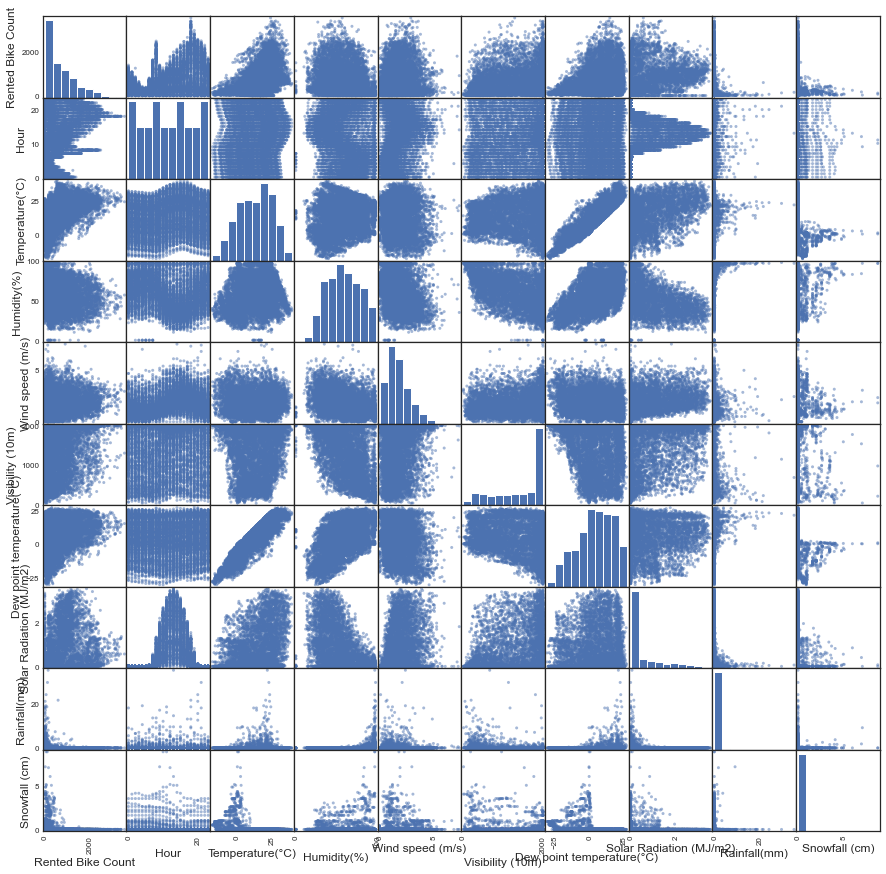

In [15]:
data_mat=pd.plotting.scatter_matrix(bike_data, figsize=(15,15))


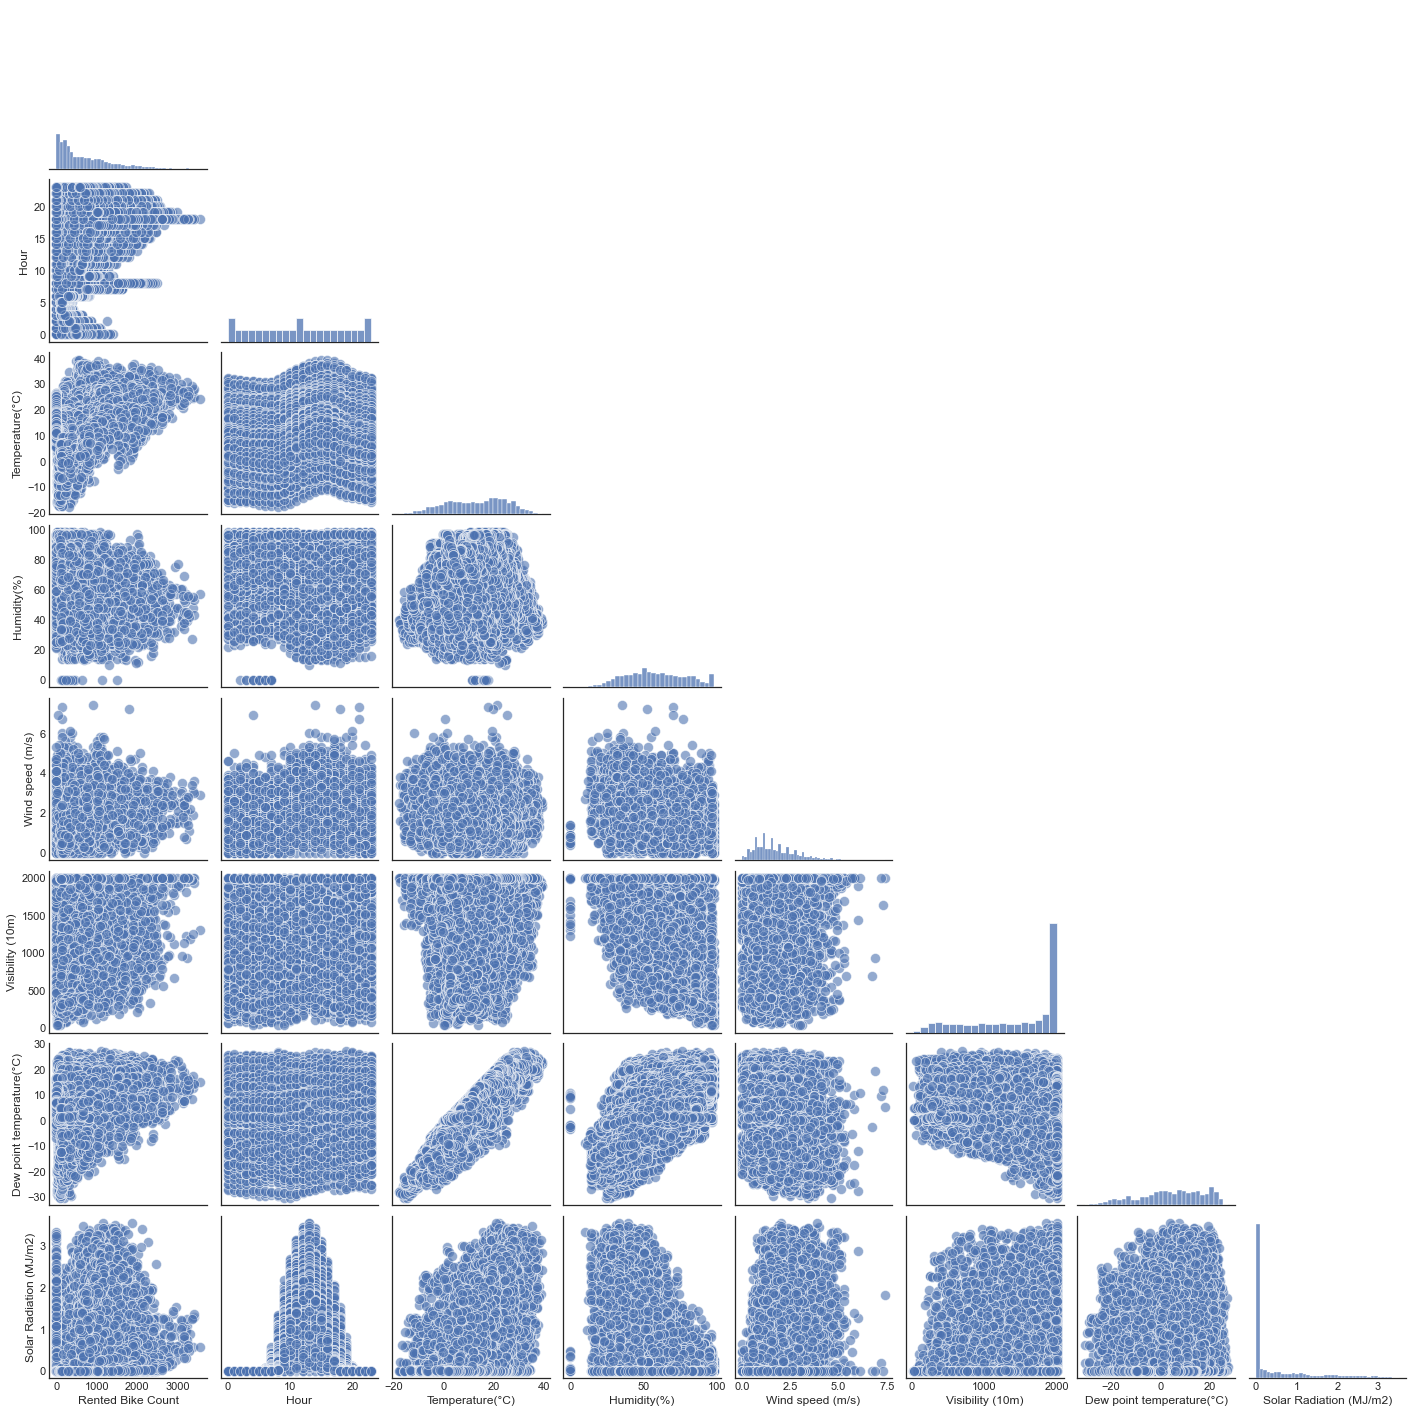

In [16]:
sns.pairplot(bike_data
                 ,vars = ['Rented Bike Count',  'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)']
                 ,diag_kind = 'hist'
                 ,plot_kws = {'alpha': 0.6, 's': 100}
                 ,corner=True)

### Dealing with Missing Values

In [17]:
bike_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [18]:
(bike_data.isnull().sum() + bike_data.isna().sum()).sum()

0

#### This data is really nice with no null/NaN values

<AxesSubplot:>

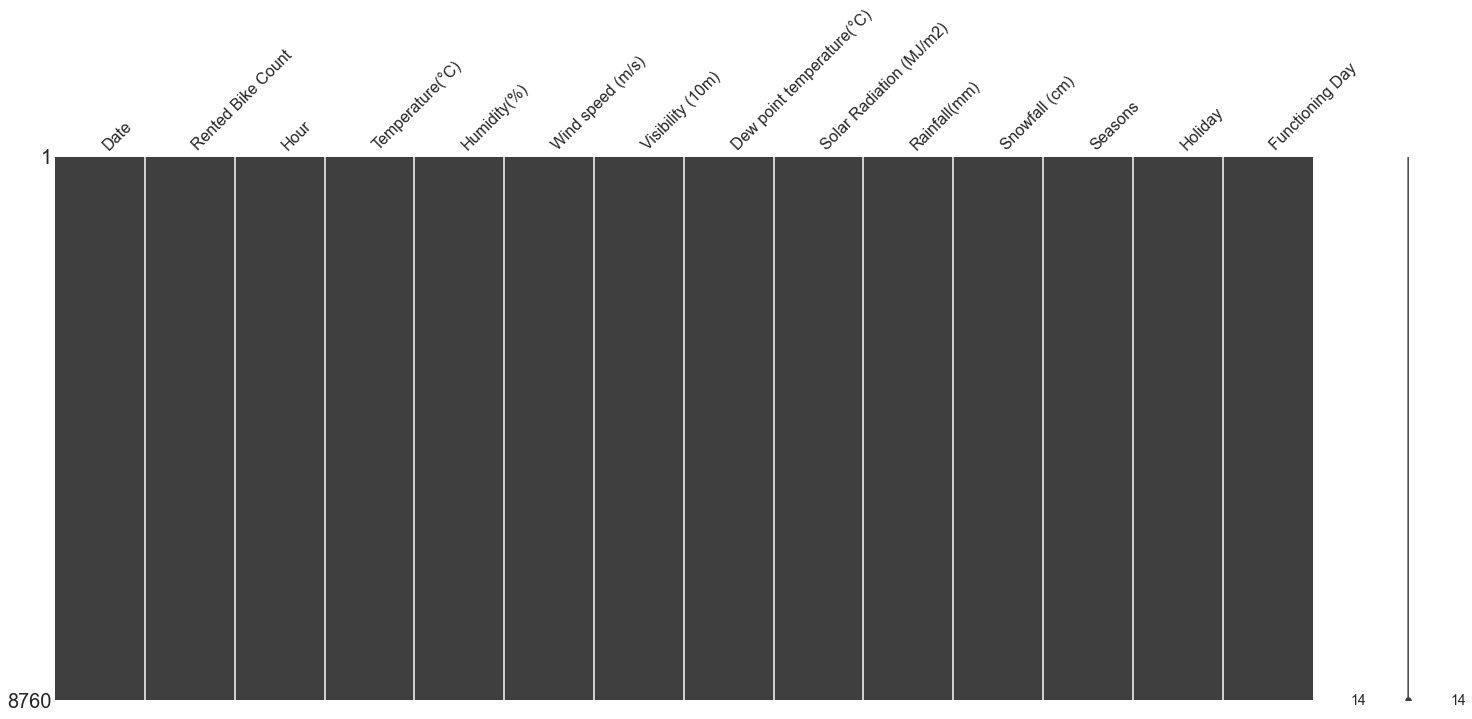

In [19]:
# Visualize if there are any missing values in the dataset

import missingno as mn
mn.matrix(bike_data)

<AxesSubplot:>

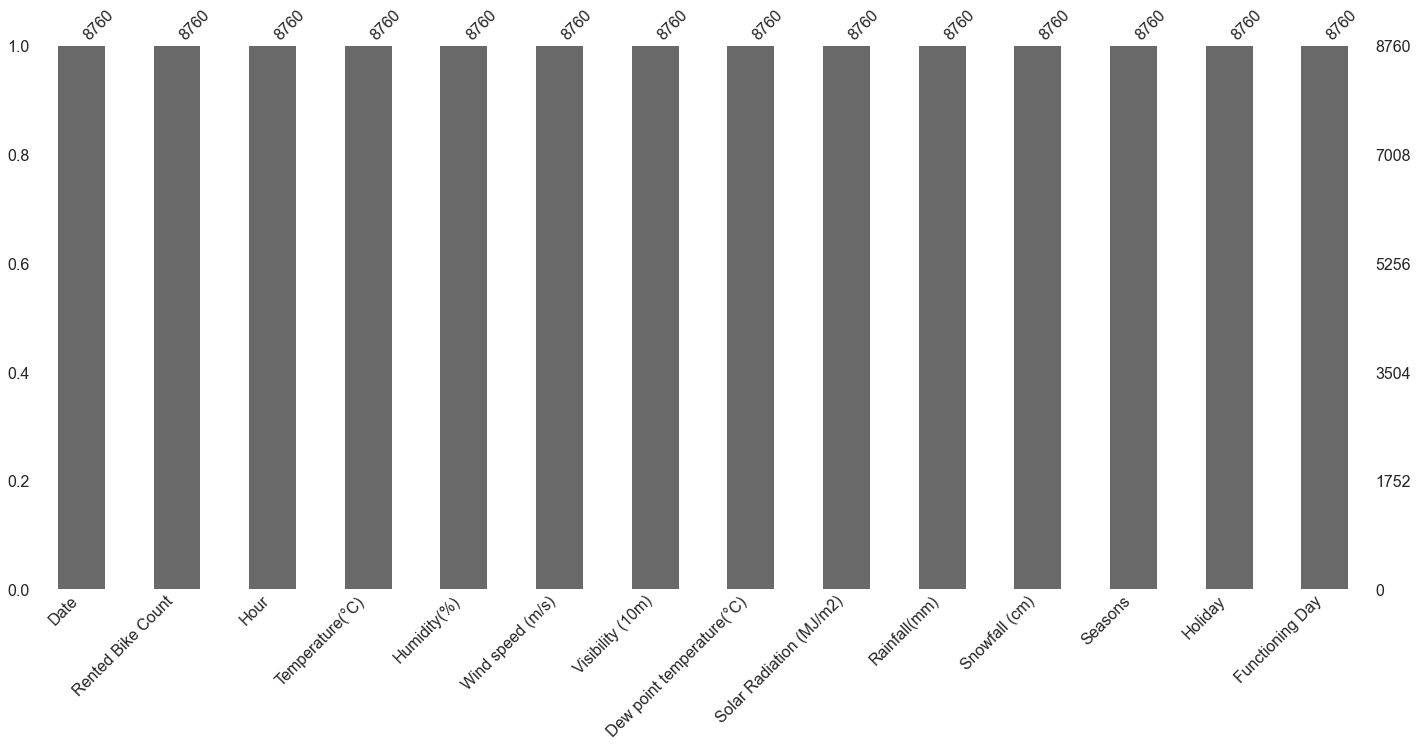

In [20]:
mn.bar(bike_data)

#### There are no missing values in the dataset.

In [21]:
Updated_Data=bike_data.sort_values(by=["Date"])
Updated_Data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
724,31/12/2017,32,4,-0.2,87,3.5,246,-2.1,0.0,0.0,1.2,Winter,Holiday,Yes
723,31/12/2017,65,3,0.3,91,2.0,172,-1.0,0.0,1.0,1.2,Winter,Holiday,Yes
722,31/12/2017,65,2,0.4,95,1.7,110,-0.3,0.0,0.0,1.2,Winter,Holiday,Yes
732,31/12/2017,209,12,1.4,47,4.5,1388,-8.7,1.1,0.0,1.0,Winter,Holiday,Yes
743,31/12/2017,227,23,-2.6,40,0.6,2000,-14.3,0.0,0.0,0.0,Winter,Holiday,Yes


### Spliting the "Date" feature into 3 independent features


In [22]:
Updated_Data["Date"]=pd.to_datetime(Updated_Data["Date"])
Updated_Data['Year'] = Updated_Data['Date'].dt.year
Updated_Data['Month'] = Updated_Data['Date'].dt.month
Updated_Data['Day'] = Updated_Data['Date'].dt.day
Updated_Data.head(5)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
744,2018-01-01,206,0,-3.2,40,0.5,1358,-14.9,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
767,2018-01-01,154,23,-1.6,51,0.7,1882,-10.4,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
766,2018-01-01,168,22,-1.3,48,0.8,1927,-10.9,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
765,2018-01-01,203,21,-0.9,44,1.2,1871,-11.6,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
764,2018-01-01,206,20,-0.3,40,1.2,1936,-12.2,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1


In [23]:
Updated_Data=Updated_Data.drop("Date",axis=1)


In [24]:
Updated_Data.head()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
744,206,0,-3.2,40,0.5,1358,-14.9,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
767,154,23,-1.6,51,0.7,1882,-10.4,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
766,168,22,-1.3,48,0.8,1927,-10.9,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
765,203,21,-0.9,44,1.2,1871,-11.6,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
764,206,20,-0.3,40,1.2,1936,-12.2,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1


### Rented Bike Distribution over day, month and year:-

In [25]:
# Count number of pickups made per month, day of week and hour of day
month_usage = pd.value_counts(Updated_Data['Month']).sort_index()
year_usage = pd.value_counts(Updated_Data['Year']).sort_index()
day_usage = pd.value_counts(Updated_Data['Day']).sort_index()

There were a total of 8760 Rental Bike pickups made


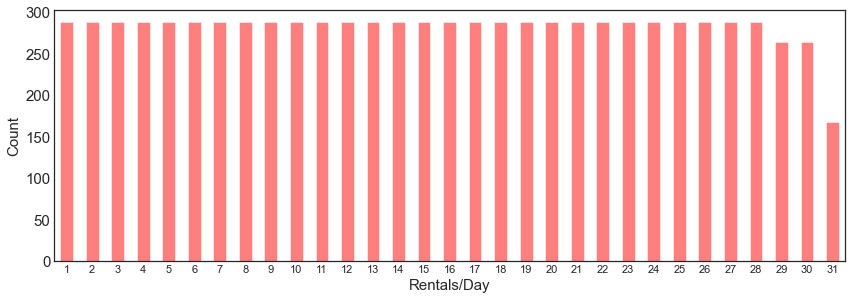

In [26]:
# define subplot
fig, ax = plt.subplots(figsize=(12, 8))
figure = plt.subplot(2, 1, 2)
day_usage.plot.bar(alpha = 0.5, color = 'red')
plt.xlabel('Rentals/Day', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation=0)
plt.yticks(fontsize = 15)
fig.tight_layout()
# print the total number of Bike pickups
print ("There were a total of %d Rental Bike pickups made" % (len(Updated_Data)))

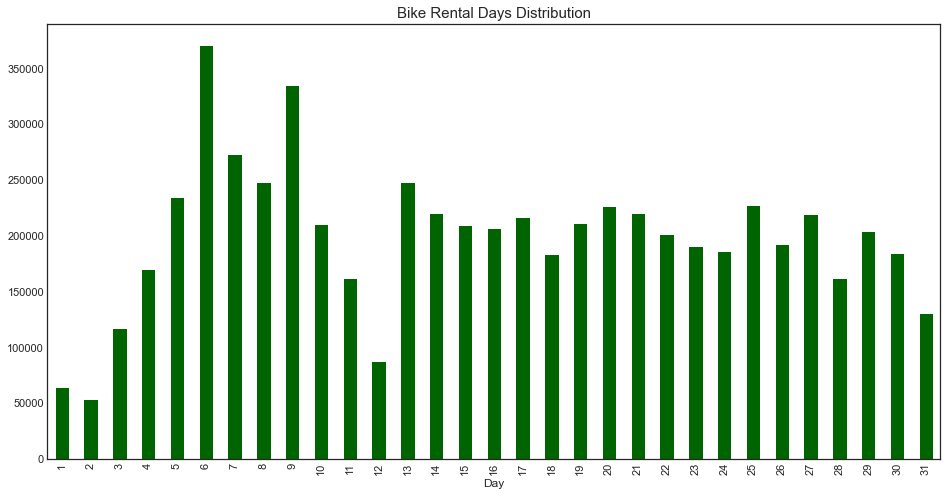

In [27]:
Grouped_D = Updated_Data.groupby('Day')['Rented Bike Count'].sum()
plt.figure(figsize=(16,8))
plt.title(("Bike Rental Days Distribution"), size = 15)
Grouped_D.plot.bar(color = 'darkgreen')
plt.show()

There were a total of 8760 Rental Bike pickups made


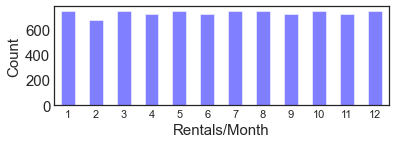

In [28]:
figure = plt.subplot(2, 1, 2)
month_usage.plot.bar(alpha = 0.5, color = 'blue')
plt.xlabel('Rentals/Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation=0)
plt.yticks(fontsize = 15)
fig.tight_layout()
# print the total number of Bike pickups
print ("There were a total of %d Rental Bike pickups made" % (len(Updated_Data)))

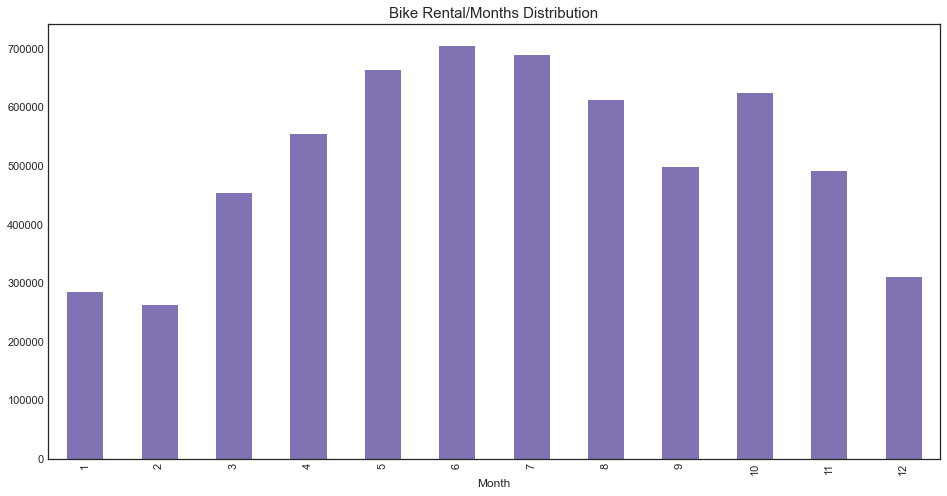

In [29]:
Grouped_M = Updated_Data.groupby('Month')['Rented Bike Count'].sum()
plt.figure(figsize=(16,8))
plt.title(("Bike Rental/Months Distribution"), size = 15)
Grouped_M.plot.bar(color = 'm')
plt.show()

There were a total of 8760 Rental Bike pickups made


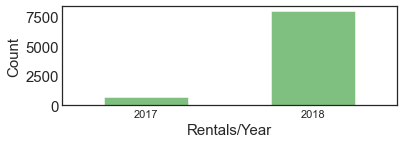

In [30]:
figure = plt.subplot(2, 1, 2)
year_usage.plot.bar(alpha = 0.5, color = 'green')
plt.xlabel('Rentals/Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation=0)
plt.yticks(fontsize = 15)
fig.tight_layout()
# print the total number of Bike pickups
print ("There were a total of %d Rental Bike pickups made" % (len(Updated_Data)))

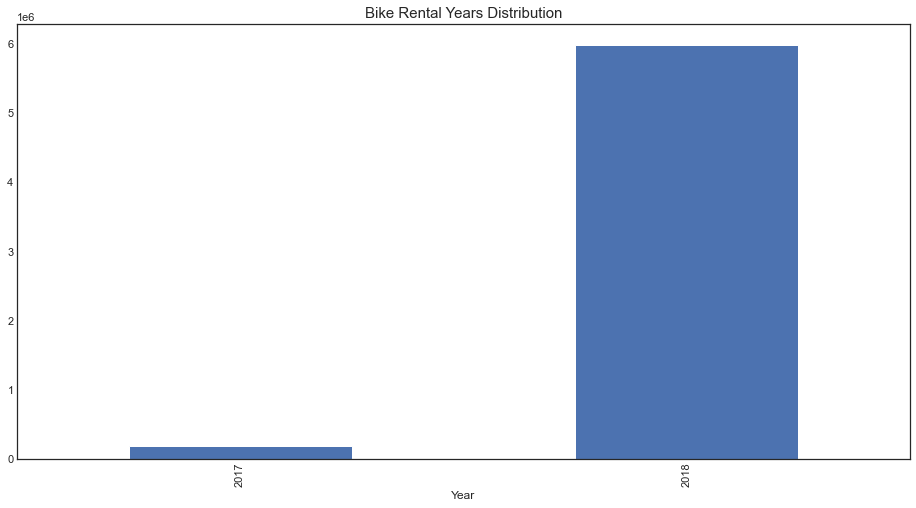

In [31]:
Grouped_Y = Updated_Data.groupby('Year')['Rented Bike Count'].sum()
plt.figure(figsize=(16,8))
plt.title(("Bike Rental Years Distribution"), size = 15)
Grouped_Y.plot.bar()
plt.show()

### Looking for correlations:-

In [32]:
corr_matrix = Updated_Data.corr()
corr_matrix["Rented Bike Count"].sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Year                         0.215162
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Month                        0.070861
Day                          0.046849
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64

The Pearson correlation evaluates the linear relationship between two continuous variables. A correlation value of 1 is considered as a total positive correlation, −1 is considered total negative correlation, and if 0 no correlation exists between the variable.

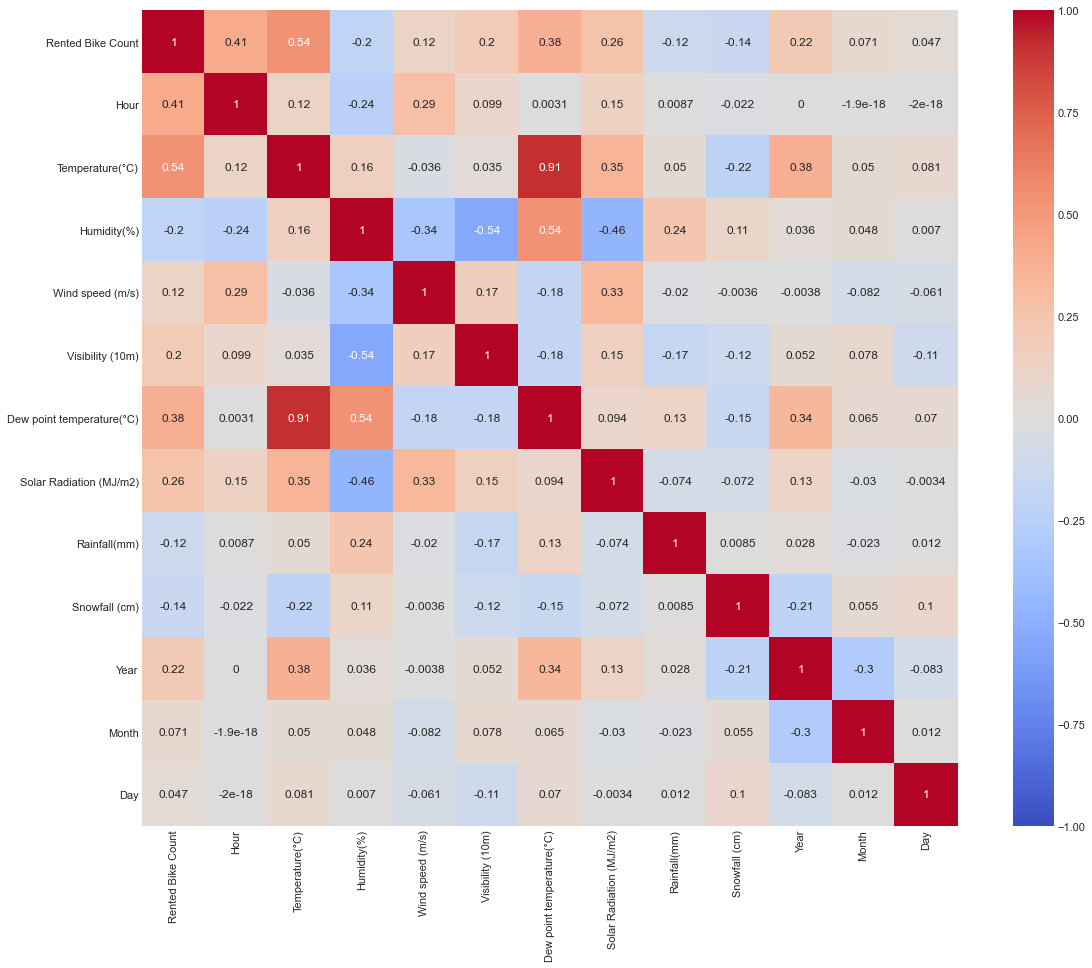

In [33]:
plt.figure(figsize=(20,15))
sns.heatmap(Updated_Data.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);


Positive correlation between the <b>"Rented Bike Count"</b> and <b>"Temperature"</b> <b>(0.54)</b> ensures that the demand for the rented bike rises when the temperature increases. The higher the temperature, the more rental bikes are used. 

The second significant correlation is between <b>"Rented Bike Count"</b> and <b>"Hour"</b> <b>(0.41)</b>. This indicates a positive correlation as the day gets busier by the hour of the day. 

Positive correlations are also notable between <b>"Rented Bike Count"</b> and <b>"Wind speed"</b>, <b>"Visibility"</b>, <b>"Dew point temperature"</b> and <b>"Solar Radiation"</b>.

There is a negative correlation of <b>(−0.12)</b> and <b>(−0.14)</b> between <b>"Rented Bike Count"</b> and <b>"Rainfall"</b>, <b>"Rented Bike Count"</b> and <b>"Snowfall"</b> respectively, which signifies that rainfall and snow are the factors influencing rental bike usage in a negative manner. In other words the bike usage decreases when the humidity or rain or snow value increases.

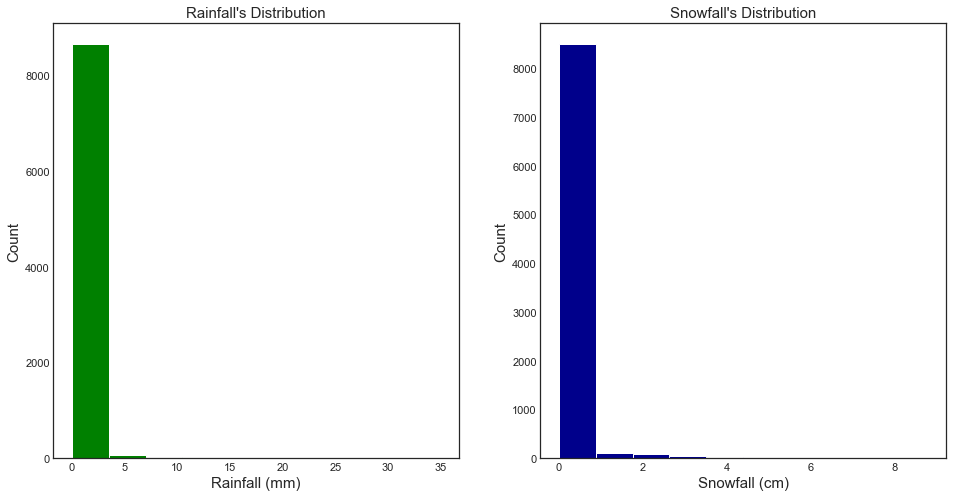

In [34]:
# visualizing the Rainfall distribution

plt.rcParams['figure.figsize'] = (16, 8)

plt.subplot(1, 2, 1)
plt.hist(bike_data['Rainfall(mm)'], color = 'green')
plt.title("Rainfall's Distribution",fontsize = 15)
plt.xlabel('Rainfall (mm)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# visualizing the Snowfall distribution

plt.subplot(1, 2, 2)
plt.hist(bike_data['Snowfall (cm)'], color = 'darkblue')
plt.title("Snowfall's Distribution",fontsize = 15)
plt.xlabel('Snowfall (cm)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

#### It also appears that temperature and dew point temperature columns are highly correlated. For that reason, we may want to exclude dew point temperature in our model below.

In [35]:
#Droping Due point point temparture has high correlation with temperature and Humidity. 
Updated_Data=Updated_Data.drop("Dew point temperature(°C)",axis=1)

#### We want to avoid multicollinearity so we should drop one of the variables.  We want to keep Temperature because it has a higher correlation with Rented Bike Count.

<h4>The order of most correlated variable ranked from high to low.</h3>

- Temperature
- Hour
- Solar Radiation
- Visibility
- Humidity
- Snowfall
- Rainfall
- Windspeed

In [36]:
Updated_Data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
744,206,0,-3.2,40,0.5,1358,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
767,154,23,-1.6,51,0.7,1882,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
766,168,22,-1.3,48,0.8,1927,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
765,203,21,-0.9,44,1.2,1871,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1
764,206,20,-0.3,40,1.2,1936,0.0,0.0,0.0,Winter,Holiday,Yes,2018,1,1


### Examine Categorical features:-

In [37]:
Updated_Data["Functioning Day"].value_counts()


Yes    8465
No      295
Name: Functioning Day, dtype: int64

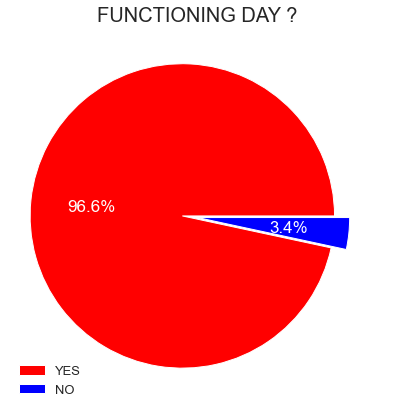

In [38]:
plt.figure(figsize = (8,7))
plt.title('FUNCTIONING DAY ?', fontsize = 20)

colors = ['red', 'blue']
labels = 'YES', 'NO'

plt.pie(Updated_Data['Functioning Day'].value_counts(), autopct = '%.1f%%', colors = colors, 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower left', fontsize = 13)

plt.show()

In [39]:
Updated_Data["Seasons"].value_counts()


Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

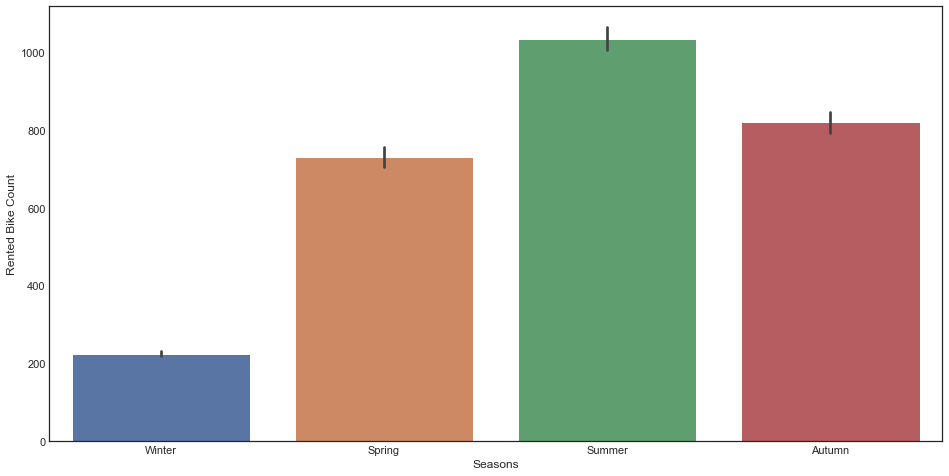

In [40]:
sns.barplot(x=Updated_Data['Seasons'],y=Updated_Data['Rented Bike Count'])

In [41]:
Updated_Data["Holiday"].value_counts()


No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

### Plot categorical data 

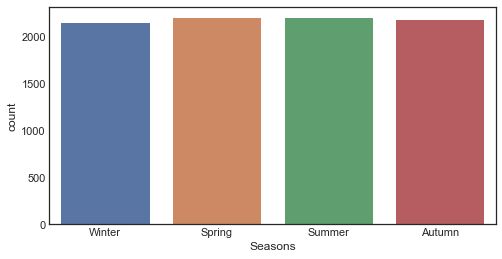

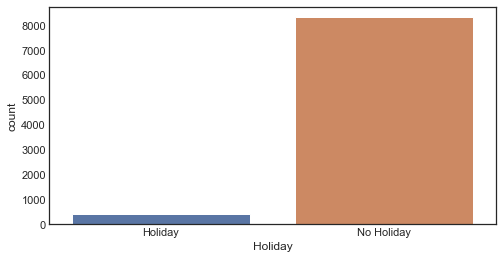

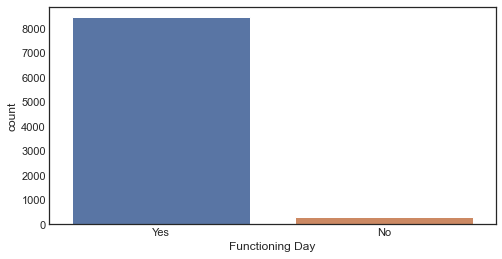

In [42]:
#Plot categorical data
cat_data = list(Updated_Data.dtypes[Updated_Data.dtypes == 'object'].index)

for i in cat_data:
    plt.figure(figsize=(8,4))
    sns.countplot(data = Updated_Data, x = i)
    plt.show()

## Preparing the Data

#### Now, we need to convert the categorical data into numerical data for the columns "Functioning Day", "Seasons" and "Holiday"

The "Holiday" and "Functioning Day" columns are categorical features so,it can be changed to have a 0 or 1 format.

For "Seasons", we have four categories, so accordingly we can assign digits from 0-3

In [43]:
le = LabelEncoder()

Updated_Data['Seasons'] = le.fit_transform(Updated_Data['Seasons'])
Updated_Data['Holiday'] = le.fit_transform(Updated_Data['Holiday'])
Updated_Data['Functioning Day'] = le.fit_transform(Updated_Data['Functioning Day'])
Updated_Data.nlargest(20, 'Rented Bike Count')

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
4818,3556,18,24.1,57,2.9,1301,0.56,0.0,0.0,2,1,1,2018,6,19
4866,3418,18,27.8,43,3.0,1933,1.35,0.0,0.0,2,1,1,2018,6,21
4650,3404,18,24.9,53,3.6,2000,1.28,0.0,0.0,2,1,1,2018,12,6
4842,3384,18,27.0,55,3.1,1246,1.26,0.0,0.0,2,1,1,2018,6,20
4458,3380,18,24.4,48,1.9,1998,0.56,0.0,0.0,2,1,1,2018,4,6
4890,3365,18,29.3,27,3.4,1977,1.24,0.0,0.0,2,1,1,2018,6,22
4554,3309,18,26.2,54,2.2,1183,0.88,0.0,0.0,2,1,1,2018,8,6
6810,3298,18,25.9,42,1.1,2000,0.48,0.0,0.0,0,1,1,2018,10,9
6978,3277,18,25.3,56,2.8,1992,0.54,0.0,0.0,0,1,1,2018,9,17
6858,3256,18,27.0,44,1.4,2000,0.62,0.0,0.0,0,1,1,2018,12,9


In [44]:
Updated_Data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
744,206,0,-3.2,40,0.5,1358,0.0,0.0,0.0,3,0,1,2018,1,1
767,154,23,-1.6,51,0.7,1882,0.0,0.0,0.0,3,0,1,2018,1,1
766,168,22,-1.3,48,0.8,1927,0.0,0.0,0.0,3,0,1,2018,1,1
765,203,21,-0.9,44,1.2,1871,0.0,0.0,0.0,3,0,1,2018,1,1
764,206,20,-0.3,40,1.2,1936,0.0,0.0,0.0,3,0,1,2018,1,1


<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

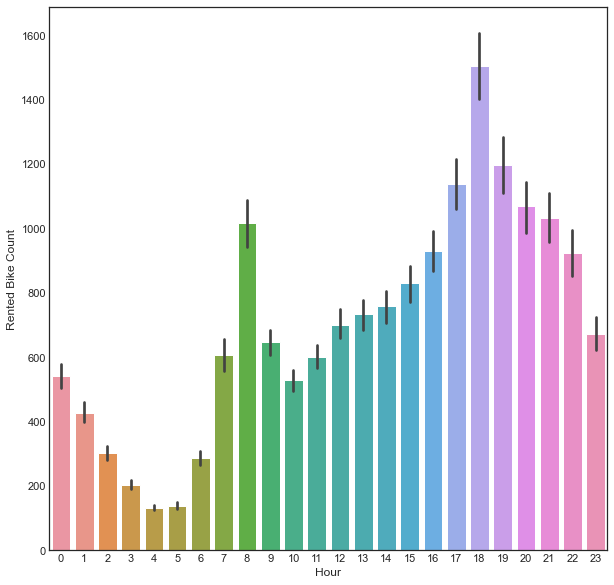

In [45]:
# Visualization of relationship between "Rented Bike Count" w.r.t "Hour"
plt.figure(figsize=(10,10))
sns.barplot(x='Hour',y='Rented Bike Count', data=Updated_Data)


#### During morning and evening, many  bike sharings are happening.


### Outliers Removal


<p>For finding out the Outlier using IQR we have to define a multiplier which is 1.5 ideally that will decide how far below Q1 and above Q3 will be considered as an Outlier.</p>


In [46]:
Q1 = Updated_Data.quantile(0.25) # First quartile
Q3 = Updated_Data.quantile(0.75) # Third quartile
IQR = Q3 - Q1 # Interquartile range
print(IQR)

Rented Bike Count           874.25
Hour                         11.50
Temperature(°C)              19.00
Humidity(%)                  32.00
Wind speed (m/s)              1.40
Visibility (10m)           1060.00
Solar Radiation (MJ/m2)       0.93
Rainfall(mm)                  0.00
Snowfall (cm)                 0.00
Seasons                       1.00
Holiday                       0.00
Functioning Day               0.00
Year                          0.00
Month                         6.00
Day                          15.00
dtype: float64


#### Any value below Q1-1.5*IQR or above Q3+1.5*IQR is an Outlier

In [47]:
((Updated_Data < (Q1- 1.5 * IQR)) | (Updated_Data > (Q3 + 1.5 * IQR))).sum()


Rented Bike Count          158
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)           161
Visibility (10m)             0
Solar Radiation (MJ/m2)    641
Rainfall(mm)               528
Snowfall (cm)              443
Seasons                      0
Holiday                    432
Functioning Day            295
Year                       744
Month                        0
Day                          0
dtype: int64

In [48]:
data_without_outliers =Updated_Data[~((Updated_Data < (Q1 - 1.5 * IQR)) |(Updated_Data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_without_outliers

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
1511,143,23,-4.5,55,0.4,1908,0.0,0.0,0.0,3,1,1,2018,1,2
1510,235,22,-3.9,52,1.2,1871,0.0,0.0,0.0,3,1,1,2018,1,2
1509,257,21,-3.2,47,1.8,1917,0.0,0.0,0.0,3,1,1,2018,1,2
1508,263,20,-2.4,36,1.0,2000,0.0,0.0,0.0,3,1,1,2018,1,2
1507,344,19,-1.8,32,1.5,2000,0.0,0.0,0.0,3,1,1,2018,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0,1,1,2018,10,31
8028,907,12,10.0,39,2.0,2000,2.2,0.0,0.0,0,1,1,2018,10,31
8016,294,0,7.1,59,1.7,2000,0.0,0.0,0.0,0,1,1,2018,10,31
8038,1088,22,6.8,58,2.2,1936,0.0,0.0,0.0,0,1,1,2018,10,31


In [49]:
print(data_without_outliers.shape)
data_without_outliers

(5853, 15)


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
1511,143,23,-4.5,55,0.4,1908,0.0,0.0,0.0,3,1,1,2018,1,2
1510,235,22,-3.9,52,1.2,1871,0.0,0.0,0.0,3,1,1,2018,1,2
1509,257,21,-3.2,47,1.8,1917,0.0,0.0,0.0,3,1,1,2018,1,2
1508,263,20,-2.4,36,1.0,2000,0.0,0.0,0.0,3,1,1,2018,1,2
1507,344,19,-1.8,32,1.5,2000,0.0,0.0,0.0,3,1,1,2018,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0,1,1,2018,10,31
8028,907,12,10.0,39,2.0,2000,2.2,0.0,0.0,0,1,1,2018,10,31
8016,294,0,7.1,59,1.7,2000,0.0,0.0,0.0,0,1,1,2018,10,31
8038,1088,22,6.8,58,2.2,1936,0.0,0.0,0.0,0,1,1,2018,10,31


In [50]:
Bike_Data_X=data_without_outliers.drop("Rented Bike Count",axis=1)
Bike_Data_y=data_without_outliers["Rented Bike Count"]

In [51]:
Bike_Data_X


,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
1511,23,-4.5,55,0.4,1908,0.0,0.0,0.0,3,1,1,2018,1,2
1510,22,-3.9,52,1.2,1871,0.0,0.0,0.0,3,1,1,2018,1,2
1509,21,-3.2,47,1.8,1917,0.0,0.0,0.0,3,1,1,2018,1,2
1508,20,-2.4,36,1.0,2000,0.0,0.0,0.0,3,1,1,2018,1,2
1507,19,-1.8,32,1.5,2000,0.0,0.0,0.0,3,1,1,2018,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,21,7.6,59,3.0,1929,0.0,0.0,0.0,0,1,1,2018,10,31
8028,12,10.0,39,2.0,2000,2.2,0.0,0.0,0,1,1,2018,10,31
8016,0,7.1,59,1.7,2000,0.0,0.0,0.0,0,1,1,2018,10,31
8038,22,6.8,58,2.2,1936,0.0,0.0,0.0,0,1,1,2018,10,31


In [52]:
Bike_Data_y=pd.DataFrame(Bike_Data_y)
Bike_Data_y

,Rented Bike Count
1511,143
1510,235
1509,257
1508,263
1507,344
...,...
8037,1069
8028,907
8016,294
8038,1088


### Spliting the data into train and test

<p> "Rented Bike Count" is a label to predict the hourly demand of bike rentals in y, we use the drop() function to take all other data in x. Then, we split the data.</p>



In [53]:
X_train, X_test, y_train, y_test = train_test_split(Bike_Data_X,Bike_Data_y, test_size=0.2)

In [54]:
X_train

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
2510,14,12.1,97,2.0,177,0.20,0.0,0.0,1,1,1,2018,3,15
1910,14,4.1,17,1.8,1996,1.87,0.0,0.0,3,1,1,2018,2,18
2192,8,-6.2,45,0.4,1600,0.17,0.0,0.0,1,1,1,2018,2,3
877,13,0.9,28,2.4,1895,1.18,0.0,0.0,3,1,1,2018,6,1
2159,23,1.8,96,1.2,745,0.00,0.0,0.0,3,1,1,2018,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,14,11.9,34,2.4,1835,2.12,0.0,0.0,0,1,1,2018,10,31
2202,18,3.5,22,0.9,1961,0.43,0.0,0.0,1,1,1,2018,2,3
3775,7,14.2,81,0.3,1991,0.13,0.0,0.0,1,1,1,2018,7,5
2810,2,11.5,75,1.9,399,0.00,0.0,0.0,1,1,1,2018,3,28


In [55]:
X_test

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
5031,15,26.4,76,3.7,1370,1.01,0.0,0.0,2,1,1,2018,6,28
8129,17,16.9,33,2.2,1972,0.43,0.0,0.0,0,1,1,2018,4,11
1822,22,0.3,33,4.0,1436,0.00,0.0,0.0,3,1,1,2018,2,14
2513,17,10.9,98,1.3,222,0.09,0.0,0.0,1,1,1,2018,3,15
4880,8,21.9,58,1.2,771,1.29,0.0,0.0,2,1,1,2018,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,4,6.3,90,1.0,240,0.00,0.0,0.0,1,1,1,2018,3,19
2824,16,18.3,43,4.3,1931,1.30,0.0,0.0,1,1,1,2018,3,28
8056,16,14.7,32,2.0,1934,1.13,0.0,0.0,0,1,1,2018,1,11
2610,18,8.6,55,2.4,1958,0.09,0.0,0.0,1,1,1,2018,3,19


In [56]:
X_test_unscaled=X_test

In [57]:
X_test.columns.to_list()

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Year',
 'Month',
 'Day']

In [58]:
y_train

,Rented Bike Count
2510,289
1910,372
2192,617
877,356
2159,23
...,...
8030,963
2202,854
3775,389
2810,225


In [59]:
y_test

,Rented Bike Count
5031,1209
8129,1596
1822,218
2513,411
4880,2283
...,...
2596,9
2824,943
8056,1206
2610,1200


### Making all features in same Scale

If we have less number of outliers which are useful to model, then use standardization. But, as we have already removed outliers, we will be using normalization

In [60]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

In [61]:
(y_train)

array([[ 289],
       [ 372],
       [ 617],
       ...,
       [ 389],
       [ 225],
       [1248]], dtype=int64)

In [62]:
y_test

array([[1209],
       [1596],
       [ 218],
       ...,
       [1206],
       [1200],
       [1881]], dtype=int64)

In [63]:
# Using MinMaxScalar()
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [64]:
X_train

array([[0.60869565, 0.50277264, 0.98979592, ..., 0.        , 0.18181818,
        0.46666667],
       [0.60869565, 0.35489834, 0.17346939, ..., 0.        , 0.09090909,
        0.56666667],
       [0.34782609, 0.16451017, 0.45918367, ..., 0.        , 0.09090909,
        0.06666667],
       ...,
       [0.30434783, 0.54158965, 0.82653061, ..., 0.        , 0.54545455,
        0.13333333],
       [0.08695652, 0.49168207, 0.76530612, ..., 0.        , 0.18181818,
        0.9       ],
       [0.        , 0.64325323, 0.56122449, ..., 0.        , 0.18181818,
        0.16666667]])

In [65]:
X_test

array([[0.65217391, 0.78071834, 0.7755102 , ..., 0.        , 0.45454545,
        0.9       ],
       [0.73913043, 0.60113422, 0.33673469, ..., 0.        , 0.27272727,
        0.33333333],
       [0.95652174, 0.28733459, 0.33673469, ..., 0.        , 0.09090909,
        0.43333333],
       ...,
       [0.69565217, 0.55954631, 0.32653061, ..., 0.        , 0.        ,
        0.33333333],
       [0.7826087 , 0.4442344 , 0.56122449, ..., 0.        , 0.18181818,
        0.6       ],
       [0.95652174, 0.6805293 , 0.55102041, ..., 0.        , 0.36363636,
        0.9       ]])

### Select and train a model:-

As we have to predict continous value output, it is a regression problem. So, We need to use some <b>regression models</b>.

### Linear Regression

As mentioned above, we need to predict continous value output for bike count required at each hour for the stable supply of rental bikes, we are going to use the simplest model firsly, <b>Linear Regression</b>.

<b>Linear regression</b> is easy to interpret results and has low complexity level.


In [66]:
# Instantiation of model
model = LinearRegression()
# Fit the model on train set
model = model.fit(X_train, y_train)

In [67]:
print(model.coef_)

[[ 7.36496362e+02  1.54763439e+03 -5.47784309e+02  6.73908565e+01
   3.54780474e+01 -1.04972517e+02 -1.13686838e-13 -1.13686838e-13
  -2.88013748e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   6.68699900e+01 -3.17815315e+00]]


In [68]:
print(model.intercept_)

[-6.6978626]


In [69]:
# Prediction on train data
pred = model.predict(X_train)

In [70]:
# Calculate score on training data
R2_on_train = r2_score(y_train, pred)
print(R2_on_train)

0.5466245892496688


In [71]:
# Calculate MSE on y_train
expected = y_train
mse = np.mean((pred-expected)**2)
mse

165793.21265650142

#### Using equations:-

In [72]:
# Calculation of score using SST and RSS
SST = np.sum((y_train - np.mean(y_train))**2)
RSS = np.sum((y_train-pred)**2)
R2_train = 1 - RSS/SST
R2 = model.score(X=X_train, y=y_train)
print(R2)
print(R2_train == R2)
R2_train

0.5466245892496688
True


0.5466245892496688

 #### MS(P)E = {SSResiduals}/{nbsamples}

In [73]:
MSPE = RSS/len(X_train)
MSPE

165793.21265650142

In [74]:
# RMSE
np.sqrt(mse)

407.1771268827627

In [75]:
#since the training labels std is 599.6, an error of 418 is pretty bad!
y_train.std()

604.7200838566343

In [76]:
# Getting Cross-validation score
lin_scores = cross_val_score(model, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print(lin_rmse_scores)
print("\nMean:-", lin_rmse_scores.mean())
print("\nStandard deviation:-", lin_rmse_scores.std())

[393.0930249  400.42672948 408.14080142 432.09083681 413.99212916
 400.34566464 406.11239613 420.56363056 407.85247334 395.85391877]

Mean:- 407.8471605215119

Standard deviation:- 11.239120754496879


<b>Note that the linear regression mean on the training set is roughly the same as that on cross-validated set. That is, the linear regression model was underfitting on the training set.</b>

### Residual Analysis of the train data

Text(0.5, 0, 'Errors')

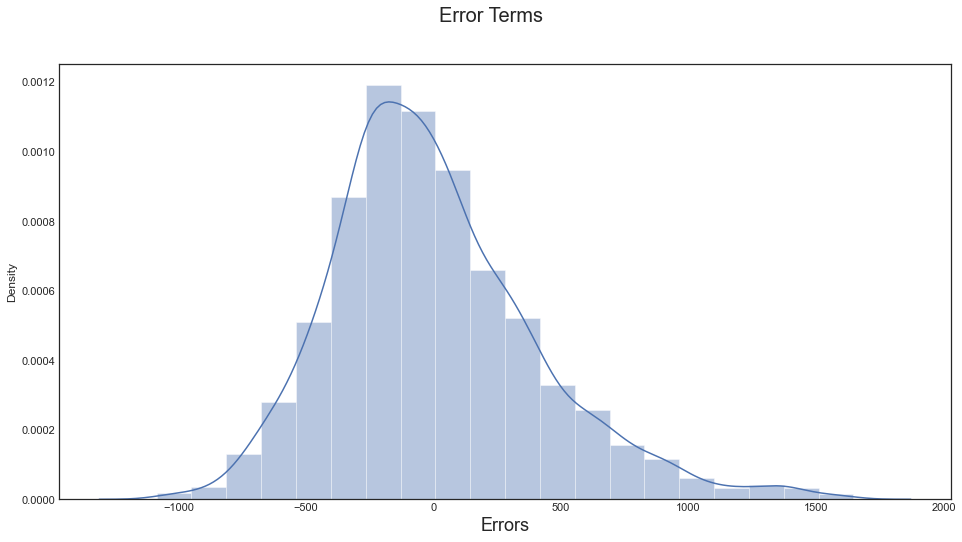

In [77]:
y_train_pred = model.predict(X_train)
fig = plt.figure(figsize=(16,8))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  


### Plotting y_train and y_train_pred to understand the spread


Text(0, 0.5, 'Predictions')

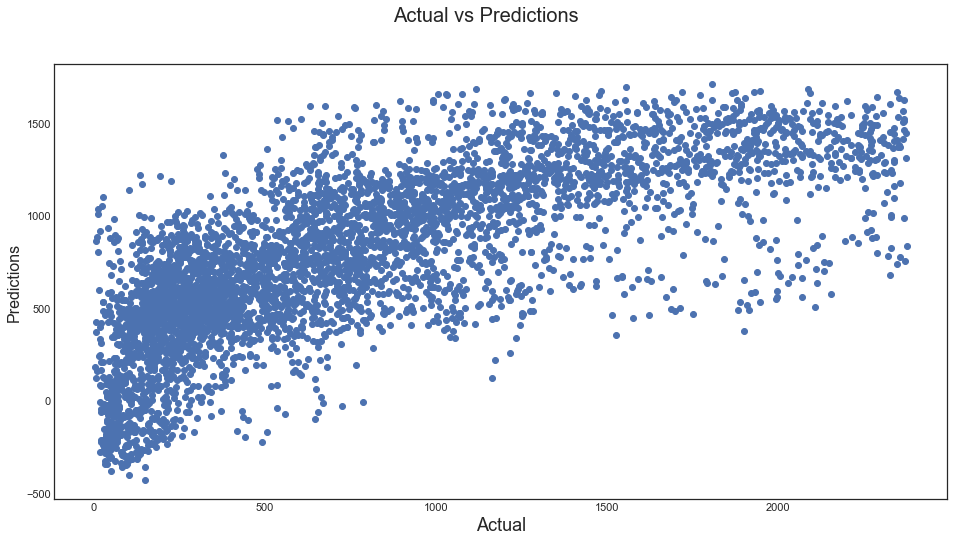

In [78]:
fig = plt.figure(figsize=(16,8))
plt.scatter(y_train,y_train_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)  

### Model Evaluation

In [79]:
# Prediction on test data
test_pred = model.predict(X_test)
pd.DataFrame(test_pred)


,0
0,1129.043791
1,1350.722391
2,762.721471
3,679.164275
4,811.869569
...,...
1166,172.294346
1167,1192.687880
1168,1206.199800
1169,932.283877


In [80]:
# Calculate MSE on y_test
expected = y_test
mse = np.mean((test_pred-expected)**2)
mse

174446.77871013206

In [81]:
# MSE using sklearn 
mean_squared_error(y_test, model.predict(X_test))

174446.77871013206

Text(0.5, 0, 'Errors')

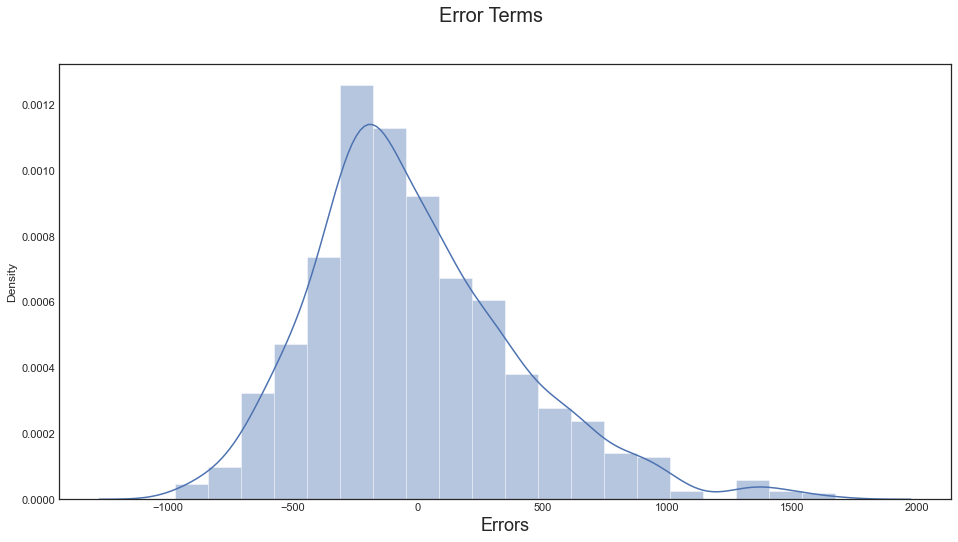

In [82]:
y_test_pred = model.predict(X_test)
fig = plt.figure(figsize=(16,8))
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [83]:
print("MSPE_train : {} \nMSPE_test : {}".format(MSPE,mse))
print(MSPE<mse)

MSPE_train : 165793.21265650142 
MSPE_test : 174446.77871013206
True


#### MSPE(training_{data}) < MSPE(test_{data})
Hence, the model has started learning the noise in the training data

In [84]:
print('RMSE_train:', np.sqrt(MSPE))
print('RMSE_test:', np.sqrt(mse))

RMSE_train: 407.1771268827627
RMSE_test: 417.66826394895276


<p>We can see that there is a slight difference between RMSE train and test data. </p>
<p>But,as the <b>RMSE</b> is too high we can't consider it as a good model. </p>
<p>We have to find the model with lower value of RMSE.</p>

### Plotting y_test and y_pred to understand the spread

Text(0, 0.5, 'Predictions')

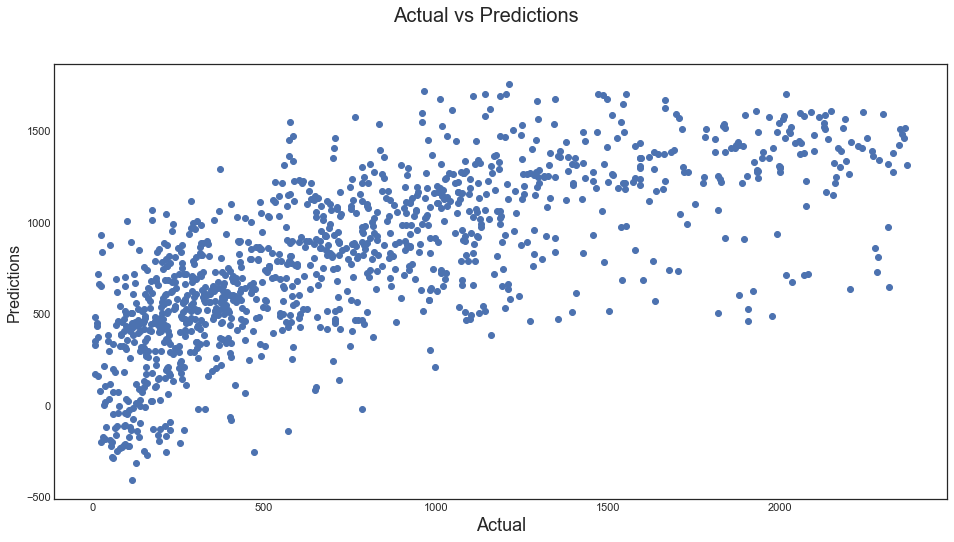

In [85]:
# Plotting y_test and y_pred to understand the spread.
y_test_pred = model.predict(X_test)
fig = plt.figure(figsize=(16,8))
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)  

In [86]:
# Calculate score on test data
R2=r2_score(y_test, test_pred)
print("coefficient of determination:",R2)
print('\nintercept:', model.intercept_)
print('\nslope:', model.coef_)
coefficients = pd.concat([pd.DataFrame(Bike_Data_X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
coefficients

coefficient of determination: 0.5165796167452961

intercept: [-6.6978626]

slope: [[ 7.36496362e+02  1.54763439e+03 -5.47784309e+02  6.73908565e+01
   3.54780474e+01 -1.04972517e+02 -1.13686838e-13 -1.13686838e-13
  -2.88013748e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   6.68699900e+01 -3.17815315e+00]]


,0,0
0,Hour,7.364964e+02
1,Temperature(°C),1.547634e+03
2,Humidity(%),-5.477843e+02
3,Wind speed (m/s),6.739086e+01
4,Visibility (10m),3.547805e+01
5,Solar Radiation (MJ/m2),-1.049725e+02
6,Rainfall(mm),-1.136868e-13
7,Snowfall (cm),-1.136868e-13
8,Seasons,-2.880137e+02
9,Holiday,0.000000e+00


### R2 value significance

R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.

R-squared is the percentage of the dependent variable variation that a linear model explains.

0% represents a model that does not explain any of the variation in the response variable around its mean.

The mean of the dependent variable predicts the dependent variable as well as the regression model.

100% represents a model that explains all of the variation in the response variable around its mean.

Usually, the larger the R2, the better the regression model fits your observations.

### Model Comparison

Now, let us use some other <b>regression models</b> and compare the differences:-

- <b>RandomForestRegressor</b>
- <b>AdaBoostRegressor</b>
- <b>BaggingRegressor</b>
- <b>SVR</b>
- <b>KNeighborsRegressor</b>

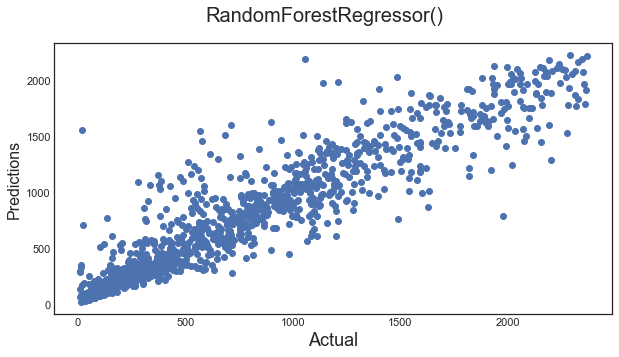

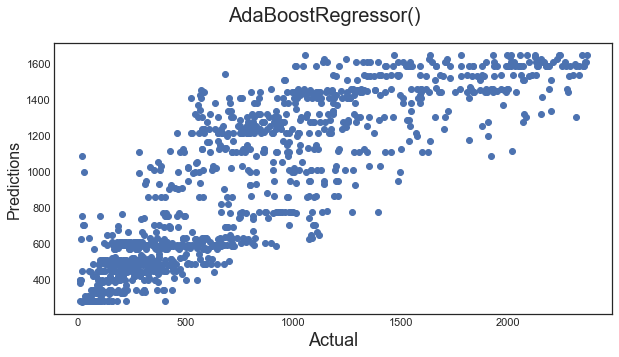

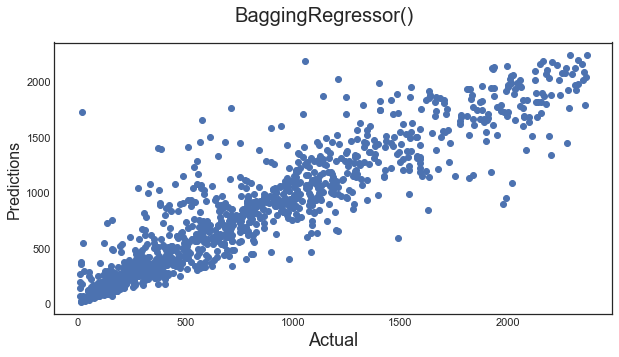

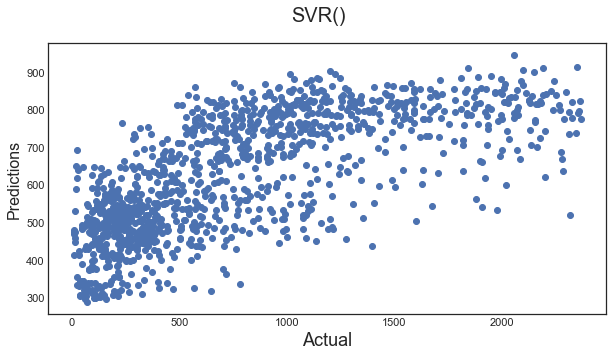

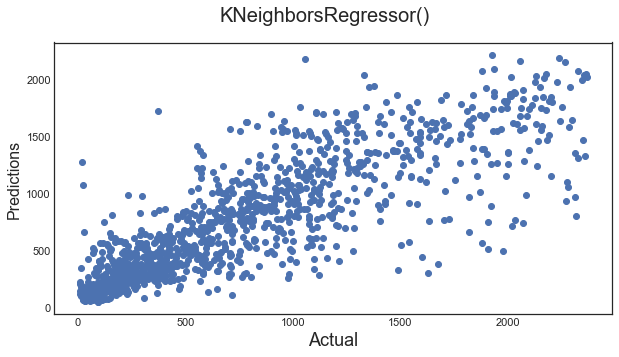

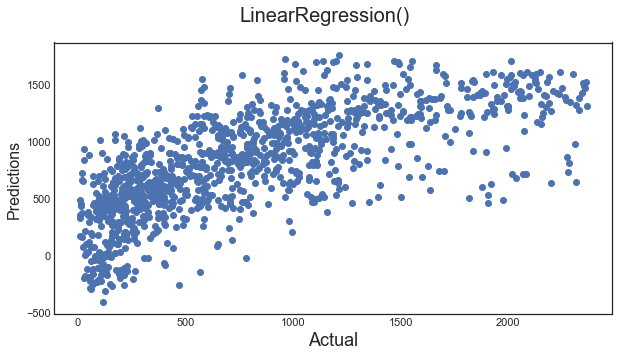

In [87]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor(),LinearRegression()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor','LinearRegression']
rmse=[]
r2=[]
d={}
for model in range (len(models)):
    mod=models[model]
    mod=mod.fit(X_train,np.ravel(y_train,order='C'))
    test_pred=mod.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
    r2.append(r2_score(y_test, test_pred))
    
    fig = plt.figure(figsize=(10,5))
    plt.scatter(y_test,test_pred)
    fig.suptitle(mod, fontsize=20)              # Plot heading 
    plt.xlabel('Actual', fontsize=18)                          # X-label
    plt.ylabel('Predictions', fontsize=16)
    

d={'Modelling Algo':model_names,'RMSE':rmse, 'R2':r2}   


In [88]:
output_frame=pd.DataFrame(d)
output_frame

,Modelling Algo,RMSE,R2
0,RandomForestRegressor,224.481982,0.860355
1,AdaBoostRegressor,346.006630,0.668235
2,BaggingRegressor,234.252579,0.847934
3,SVR,528.199044,0.226862
4,KNeighborsRegressor,334.859186,0.689268
5,LinearRegression,417.668264,0.516580


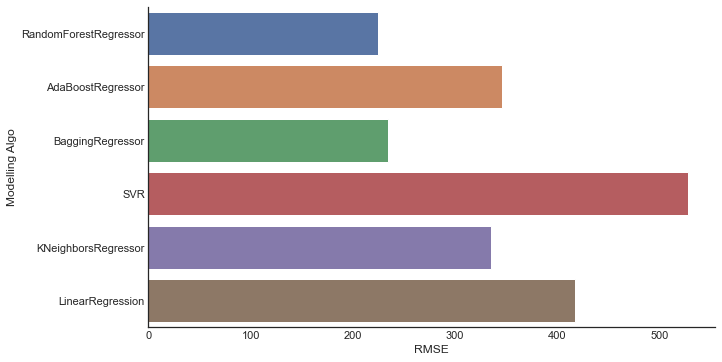

In [89]:
sns.factorplot(y='Modelling Algo',x='RMSE',data=output_frame,kind='bar',size=5,aspect=2)

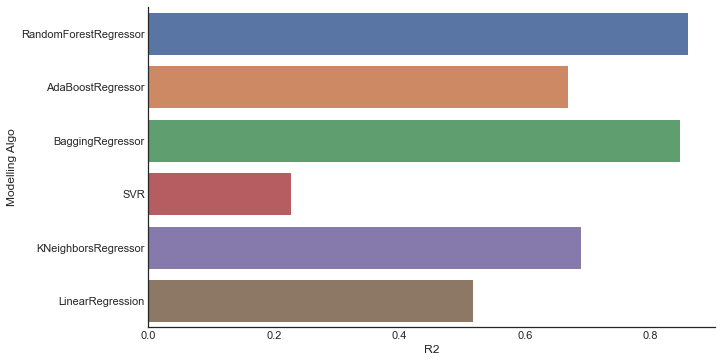

In [90]:
sns.factorplot(y='Modelling Algo',x='R2',data=output_frame,kind='bar',size=5,aspect=2)

#### We can see that 'Random Forest regressor' is giving less RMSE value and high R2 value, so we can consider the corresponding algorithm

### Random Forest Model Hyperparameter Tuning

Now, as we have selected "Random Forest Model" out of others, we then have to optimize the model for the better results

In [148]:
# Using Gridsearch to find the best set of hyperparameter
%time

depths=[1,5,50,100,150,200,250,300,350,400,500]
estimators=[1,5,50,100,150,200,250,300,350,400,500]
rf = RandomForestRegressor()

params = {'max_depth' : depths,
          'n_estimators':estimators  
          }

grid = GridSearchCV(estimator = rf,param_grid=params ,cv = 2,n_jobs = 3,scoring='r2')
grid.fit(X_train, np.ravel(y_train,order='C'))
print("best depth = ", grid.best_params_)
print("r2 value on train data = ", grid.best_score_*100)
a1 = grid.best_params_
print(a1)


Wall time: 0 ns
best depth =  {'max_depth': 500, 'n_estimators': 400}
r2 value on train data =  82.9209800771167
{'max_depth': 500, 'n_estimators': 400}


In [149]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid.rename(columns = { 'mean_test_score': 'neg_mean_test_score' }, inplace=True)
display(df_grid.sort_values('neg_mean_test_score', ascending=False)[:5]) # 5 best performing models
estimator =  grid.best_estimator_
display(estimator)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,neg_mean_test_score,std_test_score,rank_test_score
119,3.803006,0.027993,0.155503,0.005503,500,400,"{'max_depth': 500, 'n_estimators': 400}",0.832064,0.826356,0.829210,0.002854,1
43,4.727997,0.026998,0.191003,0.011999,100,500,"{'max_depth': 100, 'n_estimators': 500}",0.830905,0.827439,0.829172,0.001733,2
71,1.813500,0.000499,0.076030,0.003031,250,200,"{'max_depth': 250, 'n_estimators': 200}",0.832418,0.825819,0.829118,0.003300,3
59,1.396999,0.017998,0.055999,0.003000,200,150,"{'max_depth': 200, 'n_estimators': 150}",0.831362,0.826836,0.829099,0.002263,4
105,2.411500,0.139496,0.103498,0.001498,400,250,"{'max_depth': 400, 'n_estimators': 250}",0.831750,0.826336,0.829043,0.002707,5


RandomForestRegressor(max_depth=500, n_estimators=400)

In [150]:
optimal_depth1 = a1.get('max_depth')
optimal_bases1 = a1.get('n_estimators')

#### Final model using best parameters

In [151]:
rf = RandomForestRegressor(max_depth=optimal_depth1,n_estimators=optimal_bases1) 

rf.fit(X_train,np.ravel(y_train,order='C'))

pred = rf.predict(X_test)

Text(0, 0.5, 'Predictions')

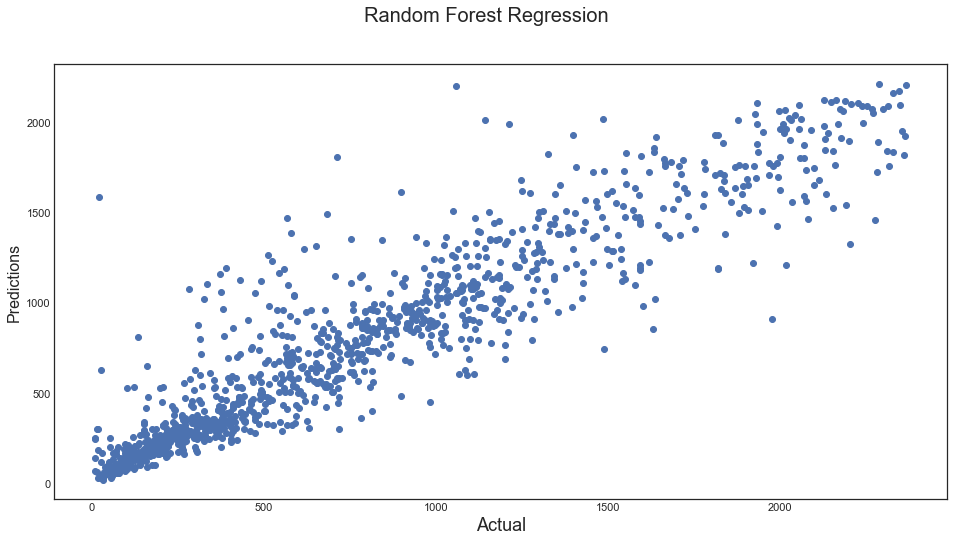

In [152]:
fig = plt.figure(figsize=(16,8))
plt.scatter(y_test,pred)
fig.suptitle('Random Forest Regression', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)

In [153]:
print('r2_score:',r2_score(y_test,pred))

r2_score: 0.8601457499728367


In [154]:
RMSE=np.sqrt(mean_squared_error(y_test,pred))
RMSE

224.65021176367335

We can observe a slight change in R2 value and RMSE by tuning the hyperparameters

### Important Features Selection

We can observe the ranking of important features as below:-

In [155]:
feature_importances = grid.best_estimator_.feature_importances_
z=pd.DataFrame(sorted(zip(feature_importances, Bike_Data_X.columns), reverse=True))
z

,0,1
0,0.421163,Hour
1,0.341347,Temperature(°C)
2,0.059872,Humidity(%)
3,0.053638,Seasons
4,0.046129,Solar Radiation (MJ/m2)
5,0.022030,Visibility (10m)
6,0.019910,Wind speed (m/s)
7,0.018997,Day
8,0.016914,Month
9,0.000000,Year


Text(0.5, 1.0, 'Feature Importance')

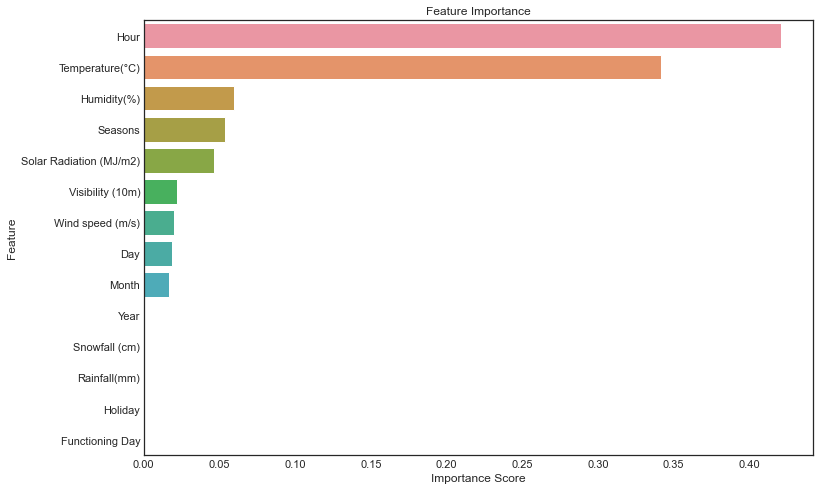

In [156]:
plt.figure(figsize=(12,8))
data=pd.DataFrame({'Feature':z[1],"Importance Score":z[0]})
sns.barplot(data=data,y='Feature',x='Importance Score')
plt.title('Feature Importance')

The top 3 variables that are seen effecting and benefitting the Bike Rental count are as follows:-
- Hour
- Temperature
- Solar Radiation

### Saving the Model

In [157]:
# save the model to disk
file_name = 'ML_model.sav'
joblib.dump(rf, open(file_name, 'wb'))


In [158]:
# Save scalar and encoder
joblib.dump(sc_X, "scaler.sav")
joblib.dump(le,"encoder.sav")

['encoder.sav']

In [159]:
# Saving the unscaled test data
joblib.dump(X_test_unscaled, open("X_test_unscaled.sav", 'wb'))

In [160]:
ls

 Volume in drive C is OS
 Volume Serial Number is 8289-C345

 Directory of C:\Users\kanik\Python_ML

30/12/2020  19:17    <DIR>          .
30/12/2020  19:17    <DIR>          ..
28/12/2020  20:42    <DIR>          .ipynb_checkpoints
28/12/2020  23:33           263,990 data.csv
29/12/2020  17:45         1,824,719 Data.sav
30/12/2020  19:18               510 encoder.sav
30/12/2020  19:18       149,995,400 ML_model.sav
30/12/2020  19:18             1,127 scaler.sav
30/12/2020  19:17         4,040,556 SupervisedLearning.ipynb
29/12/2020  17:45           131,346 X_test_scaled.sav
29/12/2020  17:45           263,990 X_test_scaled_col.sav
30/12/2020  19:18           246,207 X_test_unscaled.sav
29/12/2020  17:18         1,964,935 X_updated.sav
              10 File(s)    158,732,780 bytes
               3 Dir(s)  643,849,560,064 bytes free


### Test loading of model

In [161]:
# A few moments later, to test...
# load the scaler and model from disk
scaler2 = joblib.load("scaler.sav")
X = scaler2.transform(X_test_unscaled)

In [162]:
# Load the saved model
loaded_model = joblib.load("ML_model.sav")

In [163]:
# Predict...
loaded_model.predict(X)
pd.DataFrame(loaded_model.predict(X),columns=["Rented Bike Count"])

,Rented Bike Count
0,945.9875
1,1812.7400
2,294.3700
3,291.2550
4,1889.0275
...,...
1166,69.6425
1167,1364.0200
1168,1342.6550
1169,691.5975


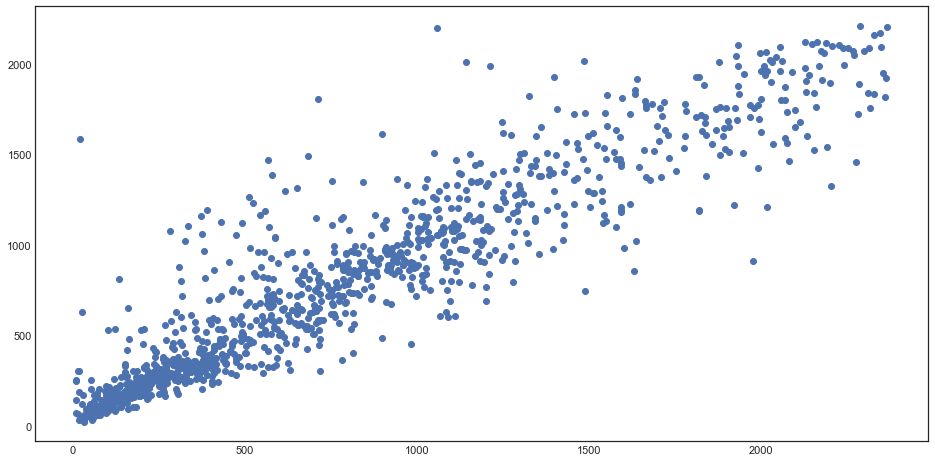

In [164]:
# Plot the results...
import matplotlib.pyplot as plt
plt.scatter(y_test, loaded_model.predict(X))

In [165]:
# R2 and RMSE
R2 = loaded_model.score(X, y_test)
RMSE=np.sqrt(mean_squared_error(y_test,loaded_model.predict(X)))
dico={'R2':[R2],'RMSE':[RMSE]}

In [166]:
pd.DataFrame(dico)

,R2,RMSE
0,0.860146,224.650212
